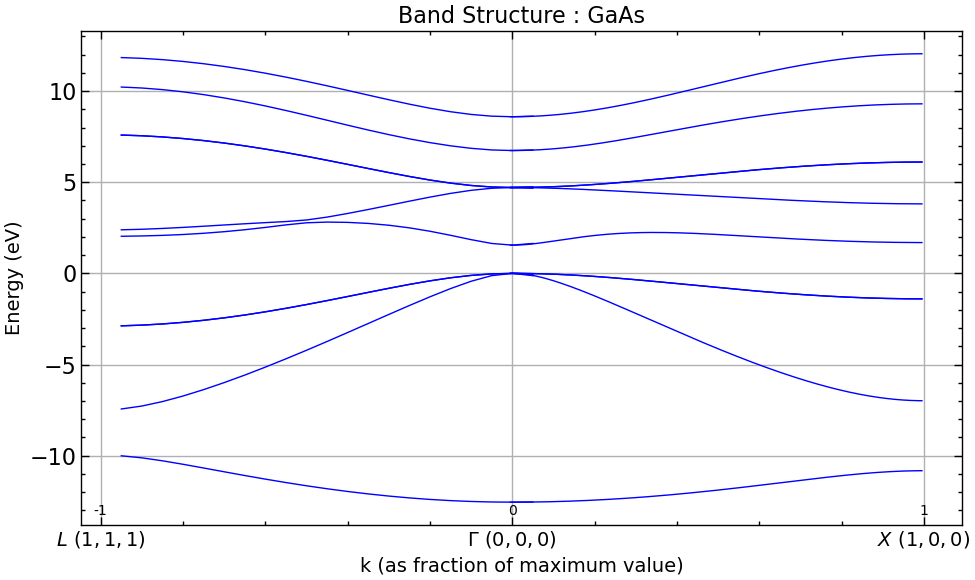

In [5]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science' , 'notebook'])

# Onsite energies (in eV)
Esa = -8.3431
Epa = 1.0414
Esc = -2.6569
Epc = 3.6686
Esea = 8.5914
Esec = 6.7386

# Hopping integrals (in eV)
Vss = -6.4513
Vxx = 1.9546
Vxy = 5.0779
Vsapc = 4.4800
Vpasc = 5.7839
Vseapc = 4.8422
Vpasec = 4.8077

# Lattice vectors (choose one consistent set)
d1 = np.array([0, 0, 0]) / 2
d2 = np.array([0, -1, -1]) / 2
d3 = np.array([-1, 0, -1]) / 2
d4 = np.array([-1, -1, 0]) / 2

# k-path direction and sampling
l, m, n = 1, 1, 1           # L-direction
kmax = np.pi
Nt = 210                    # number of k-points

E1 = []  # Store eigenvalues
X1 = []  # Store k positions

for Nk in range(Nt):
    k_frac = (Nk - 1)/ (Nt - 1)
    kvec = np.array([l, m, n]) * kmax * k_frac

    # Bloch phase factors
    p1 = np.exp(1j * np.dot(kvec, d1))
    p2 = np.exp(1j * np.dot(kvec, d2))
    p3 = np.exp(1j * np.dot(kvec, d3))
    p4 = np.exp(1j * np.dot(kvec, d4))

    # Symmetric combinations
    g0 = (p1 + p2 + p3 + p4) / 4
    g1 = (p1 + p2 - p3 - p4) / 4
    g2 = (p1 - p2 + p3 - p4) / 4
    g3 = (p1 - p2 - p3 + p4) / 4

    # Initialize 10×10 Hamiltonian
    h = np.zeros((10, 10), dtype=complex)

    # Orbital index map:
    # 0: s_A, 1: s_C, 2: px_A, 3: py_A, 4: pz_A
    # 5: px_C, 6: py_C, 7: pz_C, 8: s*_A, 9: s*_C

    # Onsite energies
    h[0, 0] = Esa / 2
    h[1, 1] = Esc / 2
    h[2, 2] = Epa / 2
    h[3, 3] = Epa / 2
    h[4, 4] = Epa / 2
    h[5, 5] = Epc / 2
    h[6, 6] = Epc / 2
    h[7, 7] = Epc / 2
    h[8, 8] = Esea / 2
    h[9, 9] = Esec / 2

    # Couplings
    h[0, 1] = Vss * g0

    h[0, 5] = Vsapc * g1
    h[0, 6] = Vsapc * g2
    h[0, 7] = Vsapc * g3

    h[1, 2] = -Vpasc * np.conj(g1)
    h[1, 3] = -Vpasc * np.conj(g2)
    h[1, 4] = -Vpasc * np.conj(g3)

    h[2, 5] = Vxx * g0
    h[2, 6] = Vxy * g3
    h[2, 7] = Vxy * g2

    h[3, 5] = Vxy * g3
    h[3, 6] = Vxx * g0
    h[3, 7] = Vxy * g1

    h[4, 5] = Vxy * g2
    h[4, 6] = Vxy * g1
    h[4, 7] = Vxx * g0

    h[5, 8] = Vseapc * g1
    h[6, 8] = Vseapc * g2
    h[7, 8] = Vseapc * g3

    h[2, 9] = -Vpasec * np.conj(g1)
    h[3, 9] = -Vpasec * np.conj(g2)
    h[4, 9] = -Vpasec * np.conj(g3)

    # Hermitize the Hamiltonian
    H = h + h.conj().T

    # Solve eigenvalue problem
    eigvals = np.linalg.eigvalsh(H)
    E1.append(np.sort(eigvals.real))
    X1.append(k_frac)

X1 = np.array(X1)
E1 = np.array(E1)


l1,m1,n1 = 1,0,0
k_max2 = 2*np.pi
Nt = 21
E2 = []
X2 = []
for Nk in range(Nt):
    k_frac = (Nk -1)/ (Nt - 1)
    kvec = np.array([l1, m1, n1]) * k_max2 * k_frac

    # Bloch phase factors
    p1 = np.exp(1j * np.dot(kvec, d1))
    p2 = np.exp(1j * np.dot(kvec, d2))
    p3 = np.exp(1j * np.dot(kvec, d3))
    p4 = np.exp(1j * np.dot(kvec, d4))

    # Symmetric combinations
    g0 = (p1 + p2 + p3 + p4) / 4
    g1 = (p1 + p2 - p3 - p4) / 4
    g2 = (p1 - p2 + p3 - p4) / 4
    g3 = (p1 - p2 - p3 + p4) / 4

    # Initialize 10×10 Hamiltonian
    h = np.zeros((10, 10), dtype=complex)

    # Orbital index map:
    # 0: s_A, 1: s_C, 2: px_A, 3: py_A, 4: pz_A
    # 5: px_C, 6: py_C, 7: pz_C, 8: s*_A, 9: s*_C

    # Onsite energies
    h[0, 0] = Esa / 2
    h[1, 1] = Esc / 2
    h[2, 2] = Epa / 2
    h[3, 3] = Epa / 2
    h[4, 4] = Epa / 2
    h[5, 5] = Epc / 2
    h[6, 6] = Epc / 2
    h[7, 7] = Epc / 2
    h[8, 8] = Esea / 2
    h[9, 9] = Esec / 2

    # Couplings
    h[0, 1] = Vss * g0

    h[0, 5] = Vsapc * g1
    h[0, 6] = Vsapc * g2
    h[0, 7] = Vsapc * g3

    h[1, 2] = -Vpasc * np.conj(g1)
    h[1, 3] = -Vpasc * np.conj(g2)
    h[1, 4] = -Vpasc * np.conj(g3)

    h[2, 5] = Vxx * g0
    h[2, 6] = Vxy * g3
    h[2, 7] = Vxy * g2

    h[3, 5] = Vxy * g3
    h[3, 6] = Vxx * g0
    h[3, 7] = Vxy * g1

    h[4, 5] = Vxy * g2
    h[4, 6] = Vxy * g1
    h[4, 7] = Vxx * g0

    h[5, 8] = Vseapc * g1
    h[6, 8] = Vseapc * g2
    h[7, 8] = Vseapc * g3

    h[2, 9] = -Vpasec * np.conj(g1)
    h[3, 9] = -Vpasec * np.conj(g2)
    h[4, 9] = -Vpasec * np.conj(g3)

    # Hermitize the Hamiltonian
    H = h + h.conj().T 

    # Solve eigenvalue problem
    eigvals = np.linalg.eigvalsh(H)
    E2.append(np.sort(eigvals.real))
    X2.append(-k_frac)

X2 = np.array(X2)
E2 = np.array(E2)


# Plotting
plt.figure(figsize=(10, 6))
for band in E1.T:
    plt.plot(X1, band, 'b', linewidth=1)

for band in E2.T:
    plt.plot(X2, band, 'b', linewidth=1)

plt.xticks(
    ticks=[-1, 0, 1],
    labels=[r'$L\ (1,1,1)$', r'$\Gamma\ (0,0,0)$', r'$X\ (1,0,0)$'],
    fontsize=14
)

# Add k-values below as annotations
ax = plt.gca()  # Get current axis
y_pos = ax.get_ylim()[0] + 0.35  # A bit above the x-axis (adjust 0.5 as needed)

plt.text(-1, y_pos, '-1', ha='center', va='bottom', fontsize=10)
plt.text(0, y_pos, '0', ha='center', va='bottom', fontsize=10)
plt.text(1, y_pos, '1', ha='center', va='bottom', fontsize=10)

    

plt.xlabel("k (as fraction of maximum value)", fontsize=14)
plt.ylabel("Energy (eV)", fontsize=14)
plt.title("Band Structure : GaAs" , fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()


